<a href="https://colab.research.google.com/github/fahmida185/Apache-Spark-BigData-Projects/blob/master/joins_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with joins

## Download and install Spark

In [3]:
!ls -l

total 5143864
-rw-r--r--  1 root root       5699 Aug 19  2019  police_station.csv
-rw-r--r--  1 root root 1680463552 Jun  3 11:01  reported-crimes.csv
-rw-r--r--  1 root root 1680463552 Jun  3 11:01 'rows.csv?accessType=DOWNLOAD'
-rw-r--r--  1 root root 1680463552 Jun  3 11:01 'rows.csv?accessType=DOWNLOAD.1'
drwxr-xr-x  1 root root       4096 May 29 18:19  sample_data
drwxrwxr-x 13 1000 1000       4096 Jun  1  2018  spark-2.3.1-bin-hadoop2.7
-rw-r--r--  1 root root  225883783 Jun  1  2018  spark-2.3.1-bin-hadoop2.7.tgz
drwxr-xr-x  2 root root       4096 Jun  4 03:11  spark-warehouse


In [4]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark

Hit:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Fetched 252 kB in 2s (149 kB/s)
Reading package lists... Done


## Setup environment

In [5]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

## Downloading and preprocessing Chicago's Reported Crime Data

In [2]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
!ls -l

--2020-06-04 03:55:22--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.68.26, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [                 <=>]   1.56G  3.09MB/s    in 8m 46s  

2020-06-04 04:04:09 (3.04 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1680463552]

total 5143864
-rw-r--r--  1 root root       5699 Aug 19  2019  police_station.csv
-rw-r--r--  1 root root 1680463552 Jun  3 11:01  reported-crimes.csv
-rw-r--r--  1 root root 1680463552 Jun  3 11:01 'rows.csv?accessType=DOWNLOAD'
-rw-r--r--  1 root root 1680463552 Jun  3 11:01 'rows.csv?accessType=DOWNLOAD.1'
drwxr-xr-x  1 root root       4096 May 29 18:19  sample_data
drwxrwxr-x 13 1000 1000       4096

In [6]:
!mv rows.csv\?accessType\=DOWNLOAD reported-crimes.csv
!ls -l

total 3723372
-rw-r--r--  1 root root       5699 Aug 19  2019  police_station.csv
-rw-r--r--  1 root root 1680463552 Jun  3 11:01  reported-crimes.csv
-rw-r--r--  1 root root 1680463552 Jun  3 11:01 'rows.csv?accessType=DOWNLOAD.1'
drwxr-xr-x  1 root root       4096 May 29 18:19  sample_data
drwxrwxr-x 13 1000 1000       4096 Jun  1  2018  spark-2.3.1-bin-hadoop2.7
-rw-r--r--  1 root root  225883783 Jun  1  2018  spark-2.3.1-bin-hadoop2.7.tgz
-rw-r--r--  1 root root  225883783 Jun  1  2018  spark-2.3.1-bin-hadoop2.7.tgz.1
drwxr-xr-x  2 root root       4096 Jun  4 03:11  spark-warehouse


In [7]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11| 

## Joins

**Download police station data**

In [8]:
!wget -O police_station.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
!ls -l

--2020-06-04 04:05:00--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.140.205, 52.206.68.26
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police_station.csv’

police_station.csv      [ <=>                ]   5.57K  --.-KB/s    in 0s      

2020-06-04 04:05:01 (511 MB/s) - ‘police_station.csv’ saved [5699]

total 3723372
-rw-r--r--  1 root root       5699 Aug 19  2019  police_station.csv
-rw-r--r--  1 root root 1680463552 Jun  3 11:01  reported-crimes.csv
-rw-r--r--  1 root root 1680463552 Jun  3 11:01 'rows.csv?accessType=DOWNLOAD.1'
drwxr-xr-x  1 root root       4096 May 29 18:19  sample_data
drwxrwxr-x 13 1000 1000       4096 Jun  1  2018  spark-2.3.1-bin-hadoop2.7
-rw-r--r--  1 root root  225883783 Jun  1  2018  spark-2.3.1-bin-

In [9]:
from pyspark.sql.functions import to_timestamp,col,lit
ps = spark.read.csv('police_station.csv',header=True)
ps.show(5)

+------------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|           1|       Central|     1718 S State St|Chicago|   IL|60616|http://home.chica...|312-745-4290|312-745-3694|312-745-3693| 1176569.052| 1891771.704|41.85837259|-87.62735617|(41.8583725929, -...|
|           6|       Gresham|   7808 S Halsted St|Chicago|   IL|60620|http://home.chica...|312-745-3617|312-745-3649|312-745-3639| 1172283.013| 1853022.646|41.75213684|-87.64422891|(41.752

**The reported crimes dataset has only the district number. Add the district name by joining with the police station dataset**

In [10]:
rc.cache()
rc.count()

6752849

In [11]:
ps.select(col('DISTRICT')).distinct().show()

+------------+
|    DISTRICT|
+------------+
|           7|
|          15|
|          11|
|           3|
|           8|
|          22|
|          16|
|           5|
|          18|
|          17|
|           6|
|          19|
|          25|
|Headquarters|
|          24|
|           9|
|           1|
|          20|
|          10|
|           4|
+------------+
only showing top 20 rows



In [12]:
rc.select(col('District')).distinct().show()

+--------+
|District|
+--------+
|     009|
|     012|
|     024|
|    null|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     003|
|     005|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
+--------+
only showing top 20 rows



In [13]:
from pyspark.sql.functions import lpad
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col, len, pad)
    Left-pad the string column to width `len` with `pad`.
    
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]
    
    .. versionadded:: 1.5



In [20]:
ps.select(lpad(col('DISTRICT'),3,'0')).show(3)

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 001|
|                 006|
|                 011|
+--------------------+
only showing top 3 rows



In [0]:
ps=ps.withColumn('Format_District',lpad(col('DISTRICT'),3,'0'))

In [24]:
rc.show(3)

+--------+-----------+-------------------+------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|2001-01-01 11:00:00|   016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11|        n

In [25]:
ps.show(3)

+--------+-------------+------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|DISTRICT|DISTRICT NAME|           ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_District|
+--------+-------------+------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|       1|      Central|   1718 S State St|Chicago|   IL|60616|http://home.chica...|312-745-4290|312-745-3694|312-745-3693| 1176569.052| 1891771.704|41.85837259|-87.62735617|(41.8583725929, -...|            001|
|       6|      Gresham| 7808 S Halsted St|Chicago|   IL|60620|http://home.chica...|312-745-3617|312-745-3649|312-745-3639| 1172283.013| 1853022.646|41.

In [26]:
rc.join( ps, rc.District== ps.Format_District ,how='inner').show(3)

+--------+-----------+-------------------+------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+--------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|      ID|Case Number|               Date|             Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_District|
+--------+-----------+-------------------+

In [27]:
rc.join( ps, rc.District== ps.Format_District,how='left_outer').show(3)

+--------+-----------+-------------------+------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+--------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|      ID|Case Number|               Date|             Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_District|
+--------+-----------+-------------------+

In [29]:
rc.show(3)

+--------+-----------+-------------------+------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|2001-01-01 11:00:00|   016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11|        n

 **What is the most frequently reported non-criminal activity?**

In [35]:
rc.select(col('Primary Type')).distinct().show(35,truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|OFFENSE INVOLVING CHILDREN       |
|CRIMINAL SEXUAL ASSAULT          |
|STALKING                         |
|PUBLIC PEACE VIOLATION           |
|OBSCENITY                        |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|ARSON                            |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|CRIMINAL TRESPASS                |
|ASSAULT                          |
|NON - CRIMINAL                   |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|THEFT                            |
|BATTERY                          |
|ROBBERY                          |
|HOMICIDE                         |
|RITUALISM                        |
|PUBLIC INDECENCY                 |
|CRIM SEXUAL ASSAULT              |
|HUMAN TRAFFICKING                |
|INTIMIDATION                     |
|PROSTITUTION                     |
|DECEPTIVE PRACTICE         

In [0]:
nc=rc.filter( col('Primary Type') =='NON-CRIMINAL' )

In [43]:
nc.groupBy(col('Description')).count().orderBy('count',ascending=False).show(truncate=False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |107  |
|FOID - REVOCATION                          |37   |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|CONCEALED CARRY LICENSE REVOCATION         |5    |
|FOUND PASSPORT                             |4    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



In [44]:
# **Using a bar chart, plot which day of the week has the most number of reported crime.
from pyspark.sql.functions import to_timestamp,to_date, dayofweek, date_format
rc.select(col('Date'),dayofweek(col('Date'))).show(5)

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2001-01-01 11:00:00|              2|
|2017-10-08 03:00:00|              1|
|2017-03-28 14:00:00|              3|
|2017-09-09 20:17:00|              7|
|2017-08-26 10:00:00|              7|
+-------------------+---------------+
only showing top 5 rows



In [45]:
help(date_format)

Help on function date_format in module pyspark.sql.functions:

date_format(date, format)
    Converts a date/timestamp/string to a value of string in the format specified by the date
    format given by the second argument.
    
    A pattern could be for instance `dd.MM.yyyy` and could return a string like '18.03.1993'. All
    pattern letters of the Java class `java.text.SimpleDateFormat` can be used.
    
    .. note:: Use when ever possible specialized functions like `year`. These benefit from a
        specialized implementation.
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_format('dt', 'MM/dd/yyy').alias('date')).collect()
    [Row(date='04/08/2015')]
    
    .. versionadded:: 1.5



In [58]:
rc.select(col('Date'),dayofweek(col('Date')),date_format(col('Date'),'E')).show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2001-01-01 11:00:00|              2|                 Mon|
|2017-10-08 03:00:00|              1|                 Sun|
|2017-03-28 14:00:00|              3|                 Tue|
|2017-09-09 20:17:00|              7|                 Sat|
|2017-08-26 10:00:00|              7|                 Sat|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [52]:
rc.groupBy(date_format(col('Date'),'E')).count().orderBy('count',ascending=False).show(truncate=False)

+--------------------+-------+
|date_format(Date, E)|count  |
+--------------------+-------+
|Fri                 |1016899|
|Wed                 |973825 |
|Tue                 |967982 |
|Sat                 |965116 |
|Thu                 |964482 |
|Mon                 |952660 |
|Sun                 |911885 |
+--------------------+-------+



In [53]:
rc.groupBy(date_format(col('Date'),'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=911885),
 Row(date_format(Date, E)='Mon', count=952660),
 Row(date_format(Date, E)='Thu', count=964482),
 Row(date_format(Date, E)='Sat', count=965116),
 Row(date_format(Date, E)='Wed', count=973825),
 Row(date_format(Date, E)='Tue', count=967982),
 Row(date_format(Date, E)='Fri', count=1016899)]

In [0]:
dow=[x[0] for x in rc.groupBy(date_format(col('Date'),'E')).count().collect()]   

In [0]:
cnt=[x[1] for x in rc.groupBy(date_format(col('Date'),'E')).count().collect()]   

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
cp=pd.DataFrame({'Day_of_Week':dow,'Count':cnt})
cp.head(5)

,Day_of_Week,Count
0,Sun,911885
1,Mon,952660
2,Thu,964482
3,Sat,965116
4,Wed,973825


Text(0.5, 1.0, 'Day of the week vs number of reported crime')

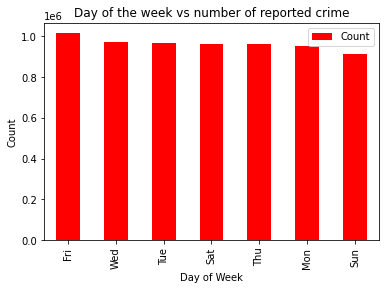

In [63]:
cp.sort_values('Count',ascending=False).plot(kind='bar', x='Day_of_Week',y='Count',color='red')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Day of the week vs number of reported crime')